In [3]:
# Libraries
#https://www.kaggle.com/datasets/vijayveersingh/the-california-wildfire-data/code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset 

df = pd.read_csv(r'C:\Users\GonDesktop\Documents\Github\Gon Projects\CaliforniaWIldfire.csv', low_memory = False)

In [7]:
# Check the proportion of missing values for each column

missing_values = df.isnull().sum()

In [9]:
# Define a threshold for removing columns with excessive missing values

threshold = 0.5 # 50% missing data threshold
columns_to_drop = missing_values[missing_values / len(df) > threshold].index

In [11]:
# Drop columns with excessive missing values

df_cleaned = df.drop(columns = columns_to_drop)

In [13]:
# Fill missing values for remaining columns
# For time-series columns, use forward fill

df_cleaned = df_cleaned.ffill()

# Alternatively, if backward fill is needed:
# df_cleaned = df_cleaned.bfill()

# Alternatively, use mean/median imputation (if time-series is not a factor)
# df_cleaned.fillna(df_cleaned.mean(), inplace=True)

Missing values after cleaning:
_id                                              0
OBJECTID                                         0
* Damage                                         0
* Street Number                                  0
* Street Name                                    0
* Street Type (e.g. road, drive, lane, etc.)     0
* City                                           0
State                                            0
* CAL FIRE Unit                                  0
County                                           0
Community                                       60
* Incident Name                                  0
Incident Number (e.g. CAAEU 123456)              0
Incident Start Date                              0
Hazard Type                                      0
* Structure Type                                 0
Structure Category                               0
* Roof Construction                              0
* Eaves                                          0


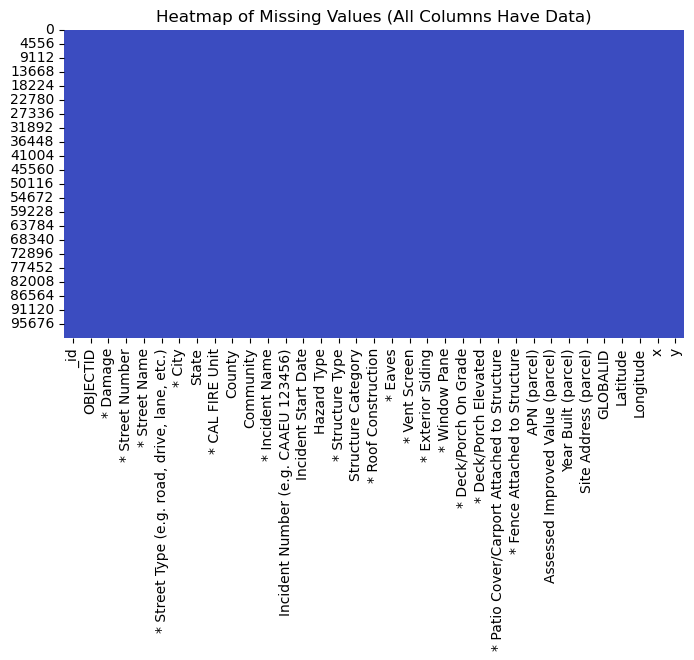

In [15]:
# Verify the cleaning

print("Missing values after cleaning:")
print(df_cleaned.isnull().sum())
print(df_cleaned.dtypes)

# --- Visualization: Heatmap of Missing Values (Simplified) ---

plt.figure(figsize = (8,4))
sns.heatmap(df_cleaned.isnull(), cbar = False, cmap = "coolwarm")
plt.title("Heatmap of Missing Values (All Columns Have Data)")
plt.show()

In [17]:
# Dataset overview

overview = {

    "Shape": df_cleaned.shape,

    "Columns": df_cleaned.columns.tolist(),

    "Data Types": df_cleaned.dtypes,

    "Missing Values": df_cleaned.isnull().sum(),

    "Summary Statistics": df_cleaned.describe(include = "all")

}

overview

{'Shape': (100230, 35),
 'Columns': ['_id',
  'OBJECTID',
  '* Damage',
  '* Street Number',
  '* Street Name',
  '* Street Type (e.g. road, drive, lane, etc.)',
  '* City',
  'State',
  '* CAL FIRE Unit',
  'County',
  'Community',
  '* Incident Name',
  'Incident Number (e.g. CAAEU 123456)',
  'Incident Start Date',
  'Hazard Type',
  '* Structure Type',
  'Structure Category',
  '* Roof Construction',
  '* Eaves',
  '* Vent Screen',
  '* Exterior Siding',
  '* Window Pane',
  '* Deck/Porch On Grade',
  '* Deck/Porch Elevated',
  '* Patio Cover/Carport Attached to Structure',
  '* Fence Attached to Structure',
  'APN (parcel)',
  'Assessed Improved Value (parcel)',
  'Year Built (parcel)',
  'Site Address (parcel)',
  'GLOBALID',
  'Latitude',
  'Longitude',
  'x',
  'y'],
 'Data Types': _id                                               int64
 OBJECTID                                          int64
 * Damage                                         object
 * Street Number             

In [19]:
# Fill missing values with 'Unknown'

df_cleaned['Community'] = df_cleaned['Community'].fillna('Unknown')

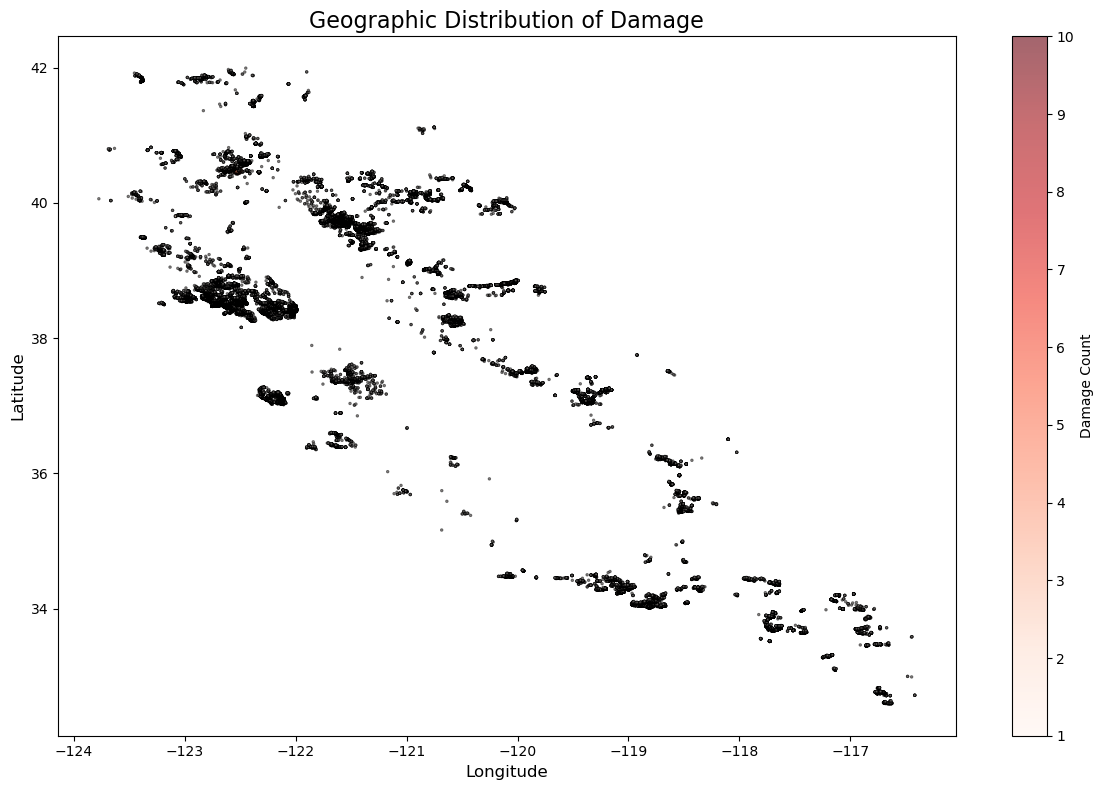

In [21]:
# Group data for plotting

geo_data = df_cleaned.groupby(['Latitude', 'Longitude'])['* Damage'].count().reset_index()

# Plot bubble map

plt.figure(figsize = (12, 8))
plt.scatter(geo_data['Longitude'], geo_data['Latitude'], s = geo_data['* Damage']*2, alpha = 0.6, c = geo_data['* Damage'], cmap = 'Reds', edgecolors = 'black')
plt.colorbar(label = 'Damage Count')
plt.title('Geographic Distribution of Damage', fontsize = 16)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel('Latitude', fontsize = 12)
plt.tight_layout()
plt.show()

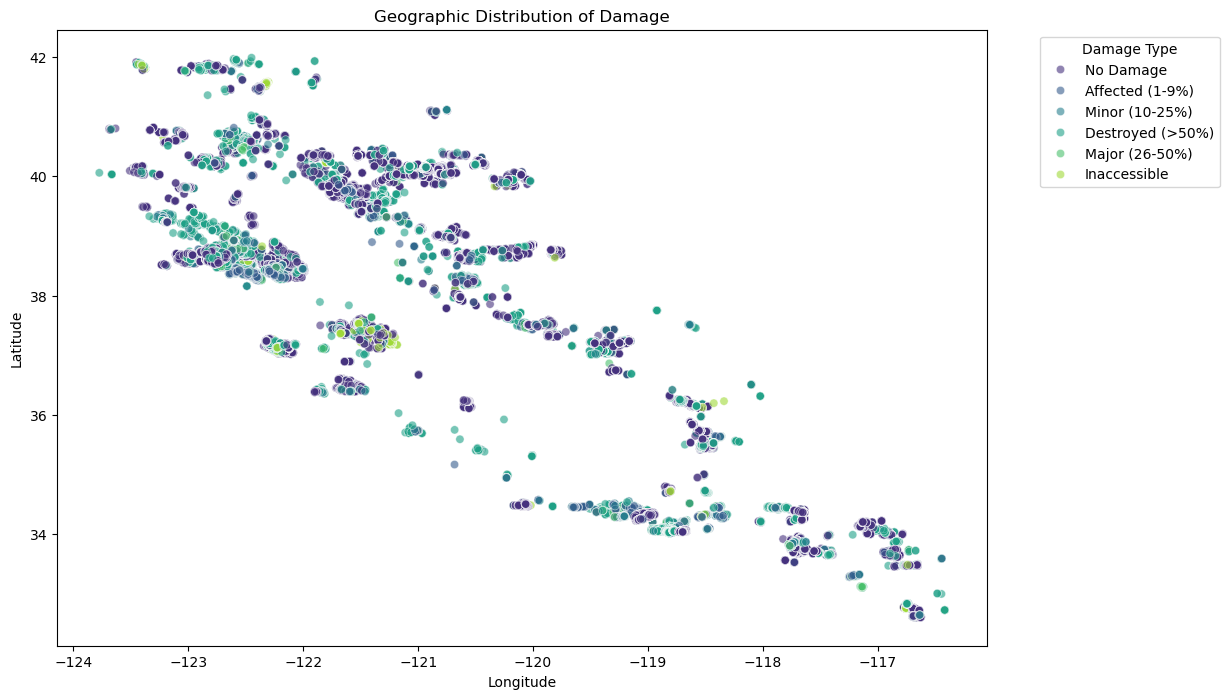

In [23]:
# Geographic distribution

plt.figure(figsize = (12,8))
sns.scatterplot(data = df_cleaned, x = 'Longitude', y = 'Latitude', hue = '* Damage', palette = 'viridis', alpha = 0.6)
plt.title('Geographic Distribution of Damage')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title = 'Damage Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [25]:
import geopandas as gpd

# Load the GeoJSON file

counties = gpd.read_file(r'C:\Users\GonDesktop\Documents\Github\Gon Projects\CaliforniaWIldfire.geojson')

In [26]:
# Inspect the columns of the GeoJSON file to find the relevant county name column

print(counties.columns)

# Ensure column alignment between GeoJSON and DataFrame
# For example, let's assume the GeoJSON has a column named "COUNTY" and `df_cleaned` uses "County"

damage_data = df_cleaned.groupby('County')['* Damage'].value_counts().unstack(fill_value = 0).reset_index()

Index(['OBJECTID', 'DAMAGE', 'STREETNUMBER', 'STREETNAME', 'STREETTYPE',
       'STREETSUFFIX', 'CITY', 'STATE', 'ZIPCODE', 'CALFIREUNIT', 'COUNTY',
       'COMMUNITY', 'BATTALION', 'INCIDENTNAME', 'INCIDENTNUM',
       'INCIDENTSTARTDATE', 'HAZARDTYPE', 'WHEREFIRESTARTEDONSTRUCTURE',
       'WHATDIDFIRESTARTFROM', 'DEFENSIVEACTIONS', 'STRUCTURETYPE',
       'STRUCTURECATEGORY', 'NUMBEROFUNITPERSTRUCTURE',
       'NOOUTBUILDINGSDAMAGED', 'NOOUTBUILDINGSNOTDAMAGED', 'ROOFCONSTRUCTION',
       'EAVES', 'VENTSCREEN', 'EXTERIORSIDING', 'WINDOWPANE',
       'DECKPORCHONGRADE', 'DECKPORCHELEVATED', 'PATIOCOVERCARPORT',
       'FENCEATTACHEDTOSTRUCTURE', 'PROPANETANKDISTANCE',
       'UTILITYMISCSTRUCTUREDISTANCE', 'FIRENAME', 'APN',
       'ASSESSEDIMPROVEDVALUE', 'YEARBUILT', 'SITEADDRESS', 'GLOBALID',
       'Latitude', 'Longitude', 'geometry'],
      dtype='object')


In [29]:
# Merge the GeoJSON with the damage data

choropleth_data = counties.merge(damage_data, left_on = 'COUNTY', right_on = 'County')

<Figure size 1200x800 with 0 Axes>

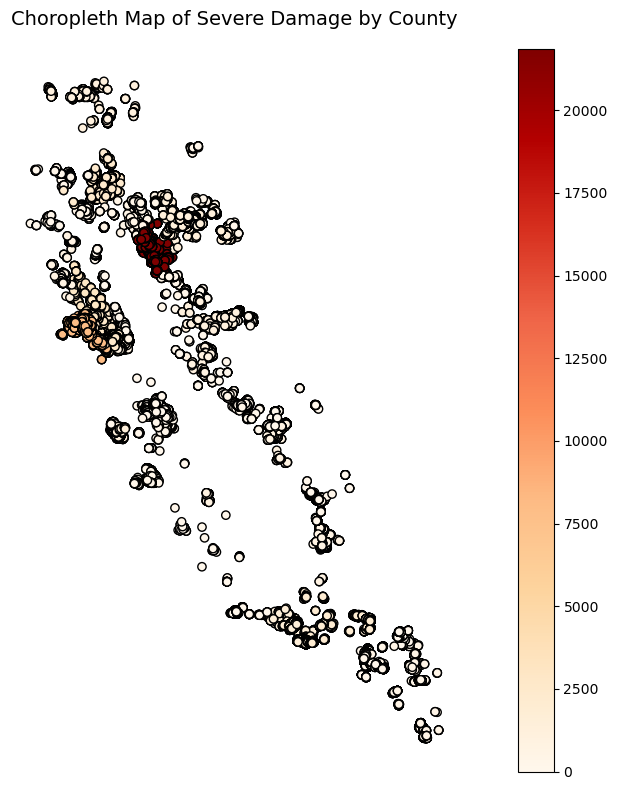

In [31]:
# Plot the choropleth map for a specific damage type (e.g., "Destroyed (>50%)")

plt.figure(figsize = (12, 8))
choropleth_data.plot(
    column = 'Destroyed (>50%)', # Replace with the damage type column
    cmap = 'OrRd',
    legend = True,
    figsize = (12, 8),
    edgecolor = 'black'
)
plt.title('Choropleth Map of Severe Damage by County',  fontsize = 14)
plt.axis('off')
plt.tight_layout()
plt.show()

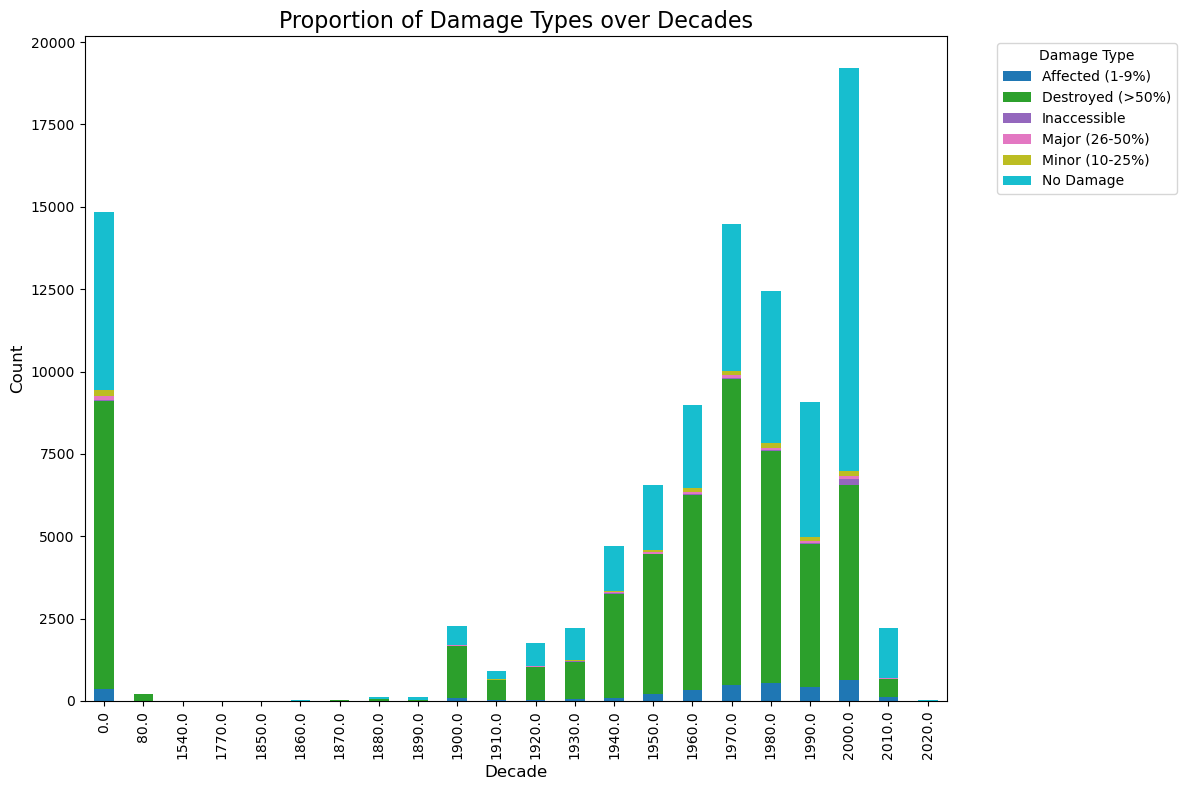

In [33]:
# Group data by decade and county for visualization
df_cleaned['Decade'] = (df_cleaned['Year Built (parcel)'] // 10) * 10

damage_decade = df_cleaned.groupby(['Decade', '* Damage'])['* Damage'].count().unstack(fill_value=0)

# Plot stacked bar chart
damage_decade.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')
plt.title('Proportion of Damage Types over Decades', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Damage Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\GonDesktop\AppData\Local\Temp\ipykernel_417616\1848425678.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x="* Damage", palette="viridis")


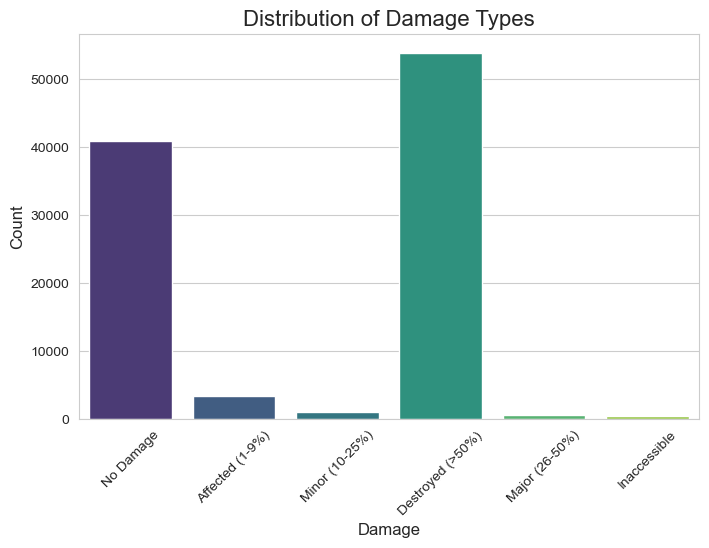

In [35]:
# Set up a consistent style for plots

sns.set_style("whitegrid")


# 1. Distribution of 'Damage'

plt.figure(figsize=(8, 5))

sns.countplot(data=df_cleaned, x="* Damage", palette="viridis")

plt.title("Distribution of Damage Types", fontsize=16)

plt.xlabel("Damage", fontsize=12)

plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45)

plt.show()

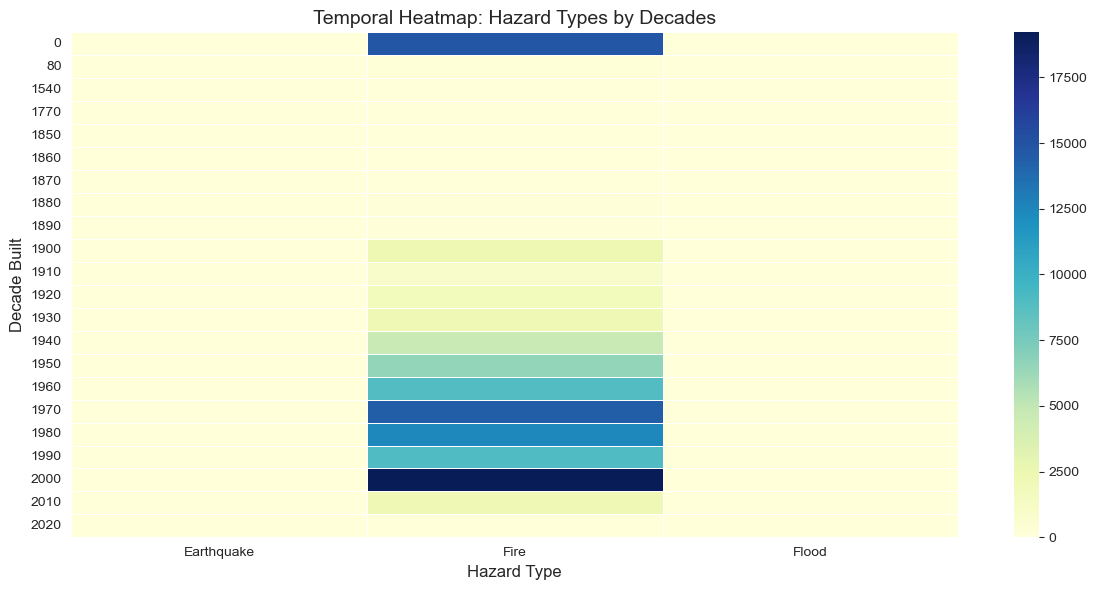

In [37]:
# Group Year Built into decades
df_cleaned['Decade Built'] = (df_cleaned['Year Built (parcel)'] // 10 * 10).astype(int)

# Pivot table for heatmap
temporal_data = df_cleaned.pivot_table(index='Decade Built', columns='Hazard Type', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(temporal_data, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Temporal Heatmap: Hazard Types by Decades', fontsize=14)
plt.xlabel('Hazard Type', fontsize=12)
plt.ylabel('Decade Built', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\GonDesktop\AppData\Local\Temp\ipykernel_417616\1848475988.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Decade'] = (filtered_data['Year Built (parcel)'] // 10) * 10


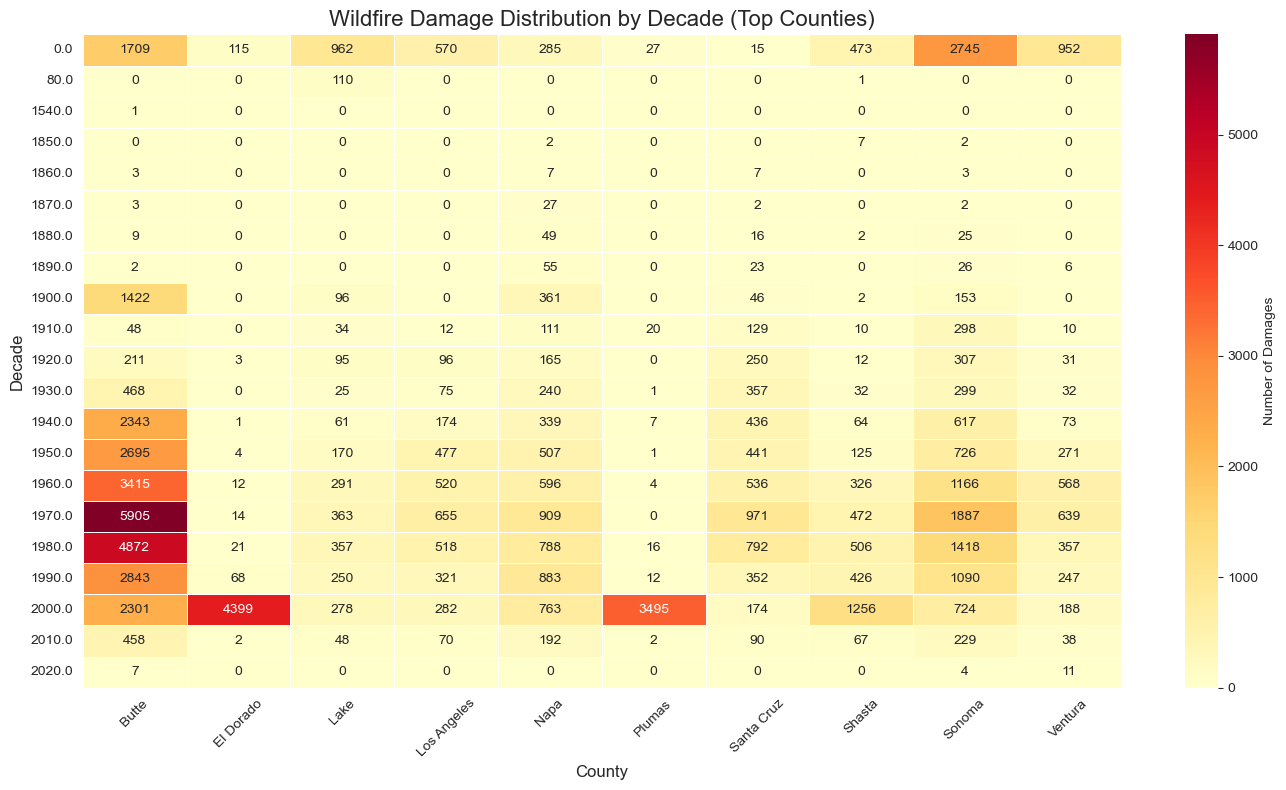

In [39]:
# Filter top counties by total damage
top_counties = (
    df_cleaned.groupby('County')['* Damage']
    .count()
    .sort_values(ascending=False)
    .head(10)  # Top 10 counties with the most damage
    .index
)

# Filter data for top counties
filtered_data = df_cleaned[df_cleaned['County'].isin(top_counties)]

# Group data by decade and county
filtered_data['Decade'] = (filtered_data['Year Built (parcel)'] // 10) * 10
heatmap_data = filtered_data.groupby(['Decade', 'County'])['* Damage'].count().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=0.5,
    annot=True,  # Add annotations for values
    fmt="d",
    cbar_kws={'label': 'Number of Damages'},
)

plt.title('Wildfire Damage Distribution by Decade (Top Counties)', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('Decade', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

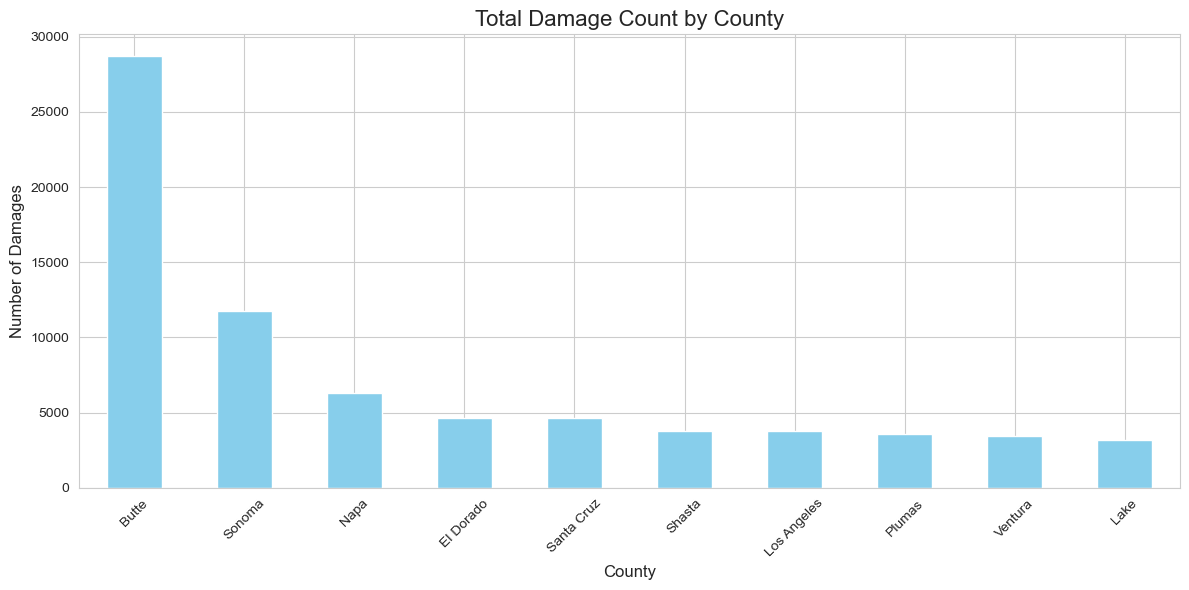

In [41]:
# Total damages by top counties
county_damage = df_cleaned[df_cleaned['County'].isin(top_counties)].groupby('County')['* Damage'].count()

# Plot
plt.figure(figsize=(12, 6))
county_damage.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Damage Count by County', fontsize=16)
plt.ylabel('Number of Damages', fontsize=12)
plt.xlabel('County', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\GonDesktop\AppData\Local\Temp\ipykernel_417616\2779803893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


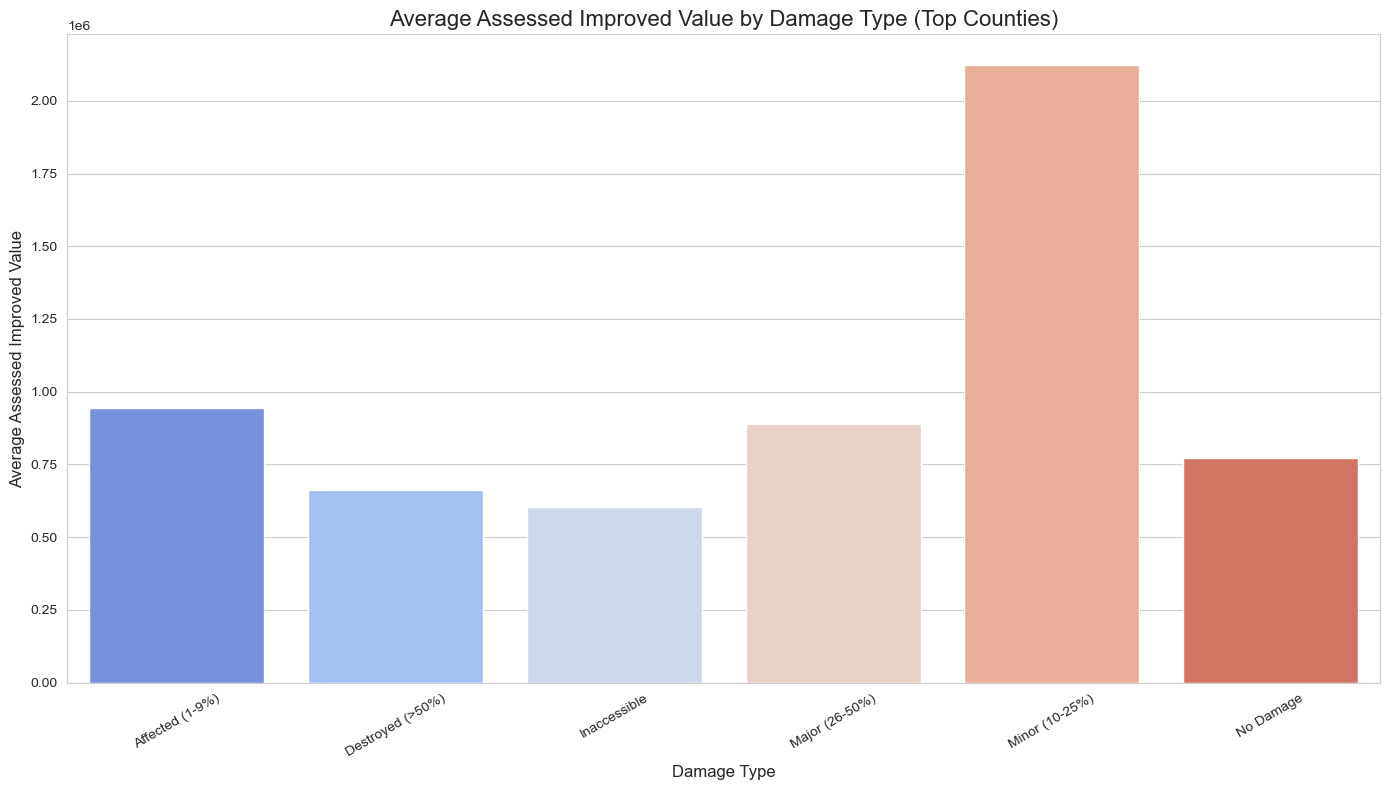

In [43]:
# Aggregate the mean Assessed Improved Value by Damage Type
agg_data = df_cleaned[df_cleaned['County'].isin(top_counties)].groupby('* Damage')['Assessed Improved Value (parcel)'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=agg_data,
    x='* Damage',
    y='Assessed Improved Value (parcel)',
    palette='coolwarm'
)
plt.title('Average Assessed Improved Value by Damage Type (Top Counties)', fontsize=16)
plt.xlabel('Damage Type', fontsize=12)
plt.ylabel('Average Assessed Improved Value', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
The Assessed Improved Value (parcel) refers to the assessed monetary value of improvements made to a property, such as buildings, structures, or enhancements on a parcel of land. This value typically excludes the raw land's worth and focuses on the improvements.

When analyzing Assessed Improved Value by Damage, you're exploring the relationship between the monetary value of property improvements and the extent of damage caused (e.g., "No Damage," "Minor (<25%)," "Moderate (25-50%)," "Destroyed (>50%)").

This analysis helps answer questions like:

Are higher-value properties more likely to experience severe damage?
How does the severity of damage correlate with property improvement value?
Are there trends in specific counties regarding higher-value properties and wildfire damage?

Why Analyze This?¶
Risk Assessment: Understanding whether higher-value properties are at greater risk can help insurance companies, local governments, and residents plan better.
Recovery Prioritization: Identifying areas with high damage to high-value properties can guide resource allocation post-disaster.
Insight into Vulnerabilities: The analysis may highlight vulnerabilities in the construction, location, or type of property improvements.